In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB


In [6]:
dfWhite = pd.read_csv(r'C:\Users\Morga\OneDrive\Desktop\ISchool\IST707 Data Analytics\Gproject 707\Final hand in\winequality-white.csv',sep=';')
dfRed = pd.read_csv(r'C:\Users\Morga\OneDrive\Desktop\ISchool\IST707 Data Analytics\Gproject 707\Final hand in\winequality-red.csv',sep=';')
frames = [dfWhite, dfRed]

df = pd.concat(frames)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
print(df.shape)
print(df.info())

(6497, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB
None


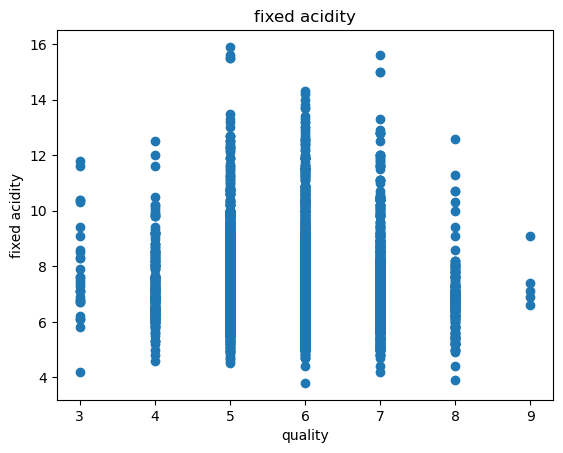

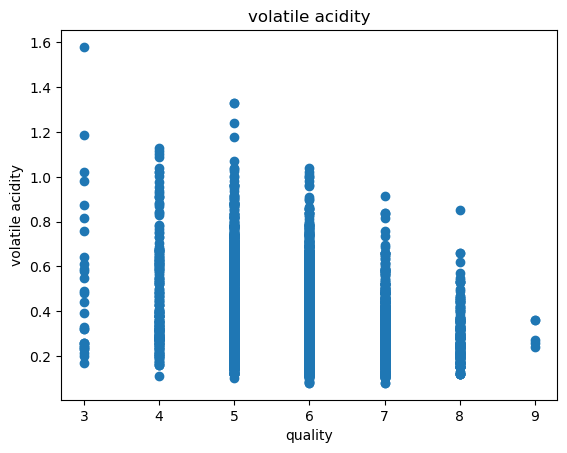

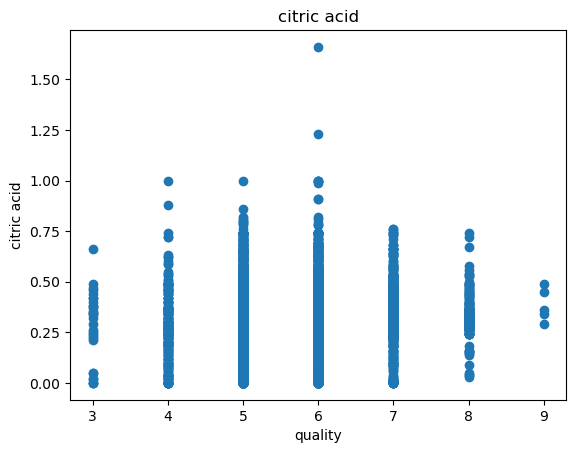

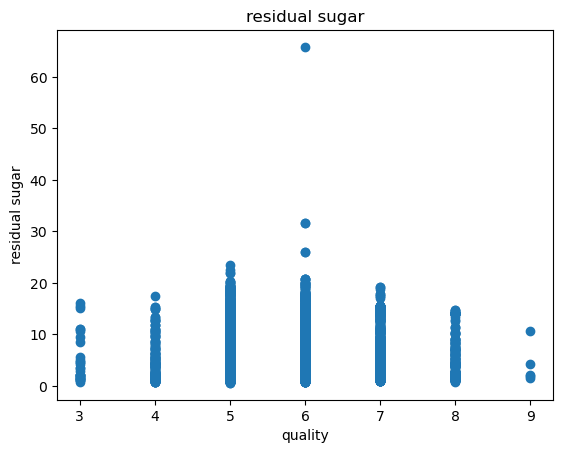

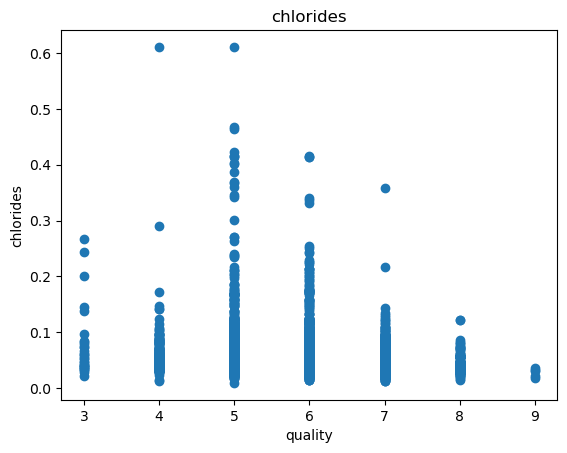

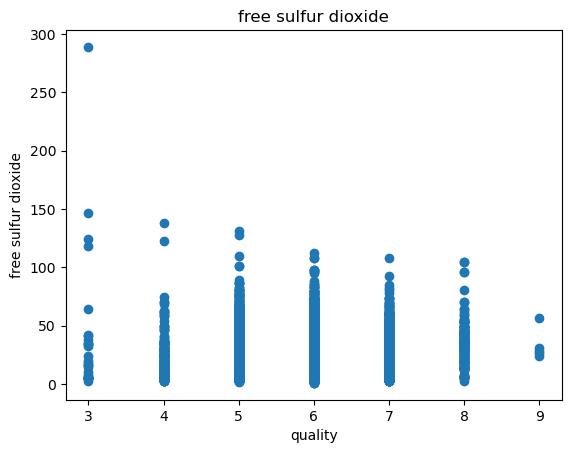

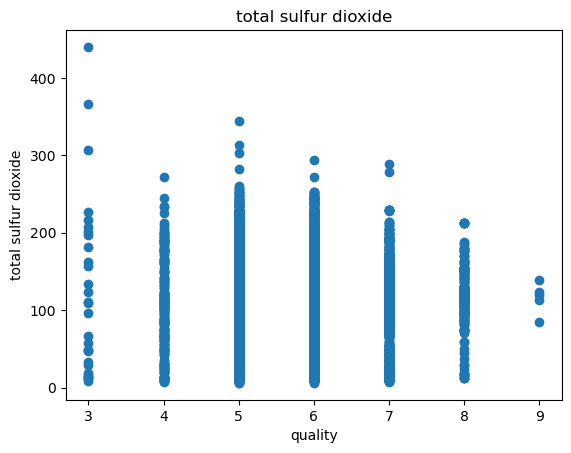

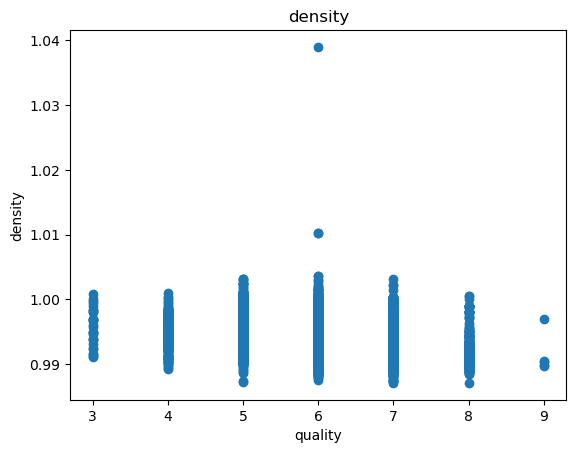

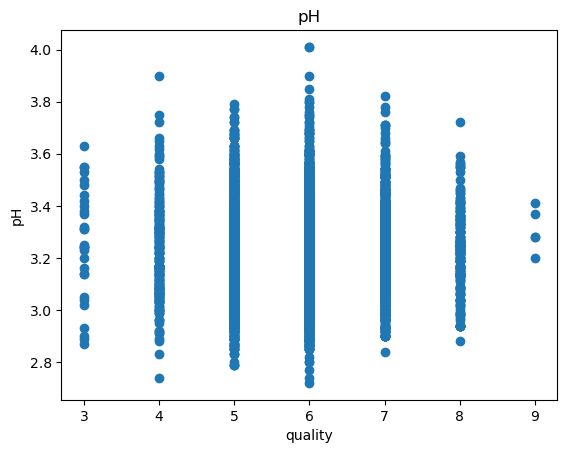

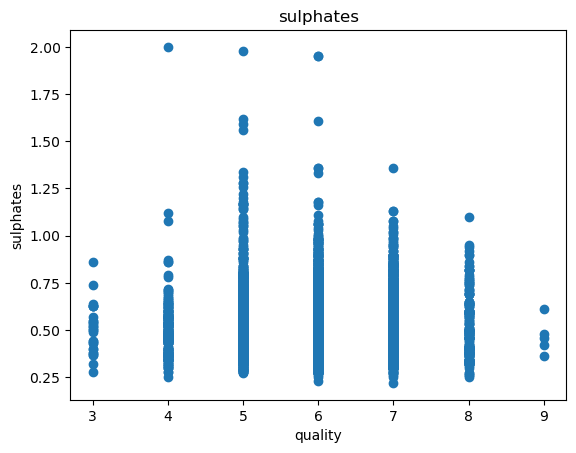

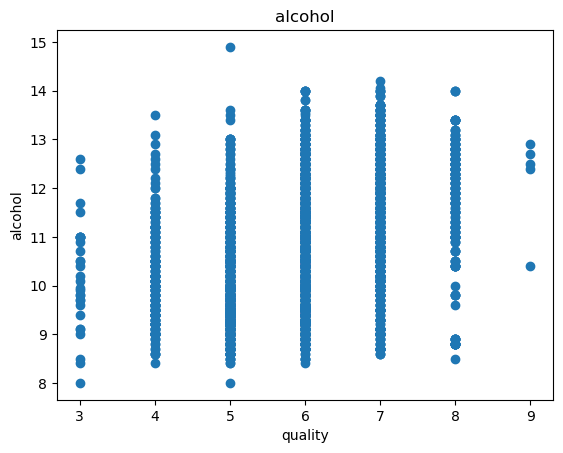

In [9]:
#Explore all Attributes by Wine Quality
for label in df.columns[:-1]:
    plt.scatter(df['quality'], df[label])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
    #plt.savefig('imgs/'+'red'.join(label.split(' ')))
    plt.show()


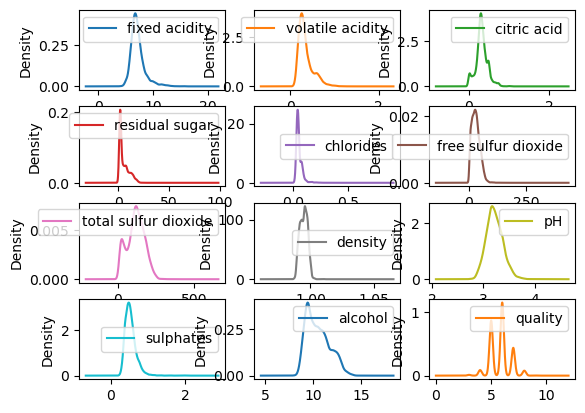

In [10]:
df.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
#plt.savefig('imgs/density/'+'redDensity'.join(label.split(' ')))
plt.show()


In [11]:
#Correlation Matrix
corr_matrix = df.corr()
print(corr_matrix)


                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [12]:
print(df.columns)
print(df[df.columns[0]].size)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
6497


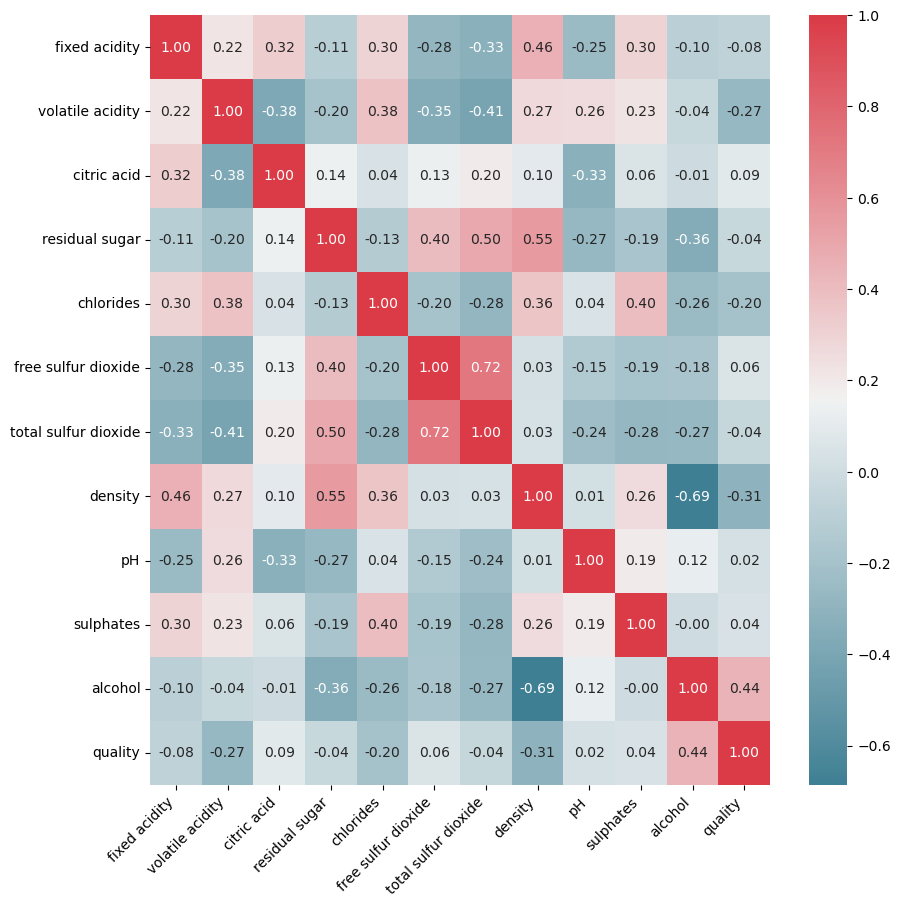

In [14]:
#Column Names

column_names = df.columns

#Figure Size
fig,ax = plt.subplots(figsize=(10,10))

colormap = sns.diverging_palette(220,10, as_cmap=True);

sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f");

ax.set_xticklabels(column_names, rotation=45, horizontalalignment="right");
#plt.savefig('imgs/matrix/'+'redCorrelationMatrix'.join(label.split(' ')))
plt.show()


In [15]:
bins = [0, 5.5, 7.5, 10] # this means 3-5 are low, 6-7 are mid, 8-9 are high
labels = [0, 1, 2]
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [17]:
df.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
dtype: object

In [16]:
#Here we need to convert the Quality to an Int64
['quality'] = df['quality'].astype('category').cat.codes


SyntaxError: cannot assign to literal (3265772817.py, line 2)

In [19]:
x = df[df.columns[:-1]]
y = df['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=51)

In [21]:
for data in [y_train, y_test]:
    print(data.describe())

count     4223
unique       3
top          1
freq      2532
Name: quality, dtype: int64
count     2274
unique       3
top          1
freq      1383
Name: quality, dtype: int64


In [22]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       830
           1       0.82      0.86      0.84      1383
           2       0.95      0.31      0.47        61

    accuracy                           0.80      2274
   macro avg       0.85      0.64      0.69      2274
weighted avg       0.81      0.80      0.80      2274



In [23]:
#Naive Bayes (GaussianNB)
x = df[df.columns[:-1]]
y = df['quality']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=51)
gnb = GaussianNB()


In [26]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [27]:
print("Number of mislabeled points out of a total %d points : %d"  % (X_test.shape[0], (y_test != y_pred).sum()))
print("Naive Bayes Accuracy: " + str((1 - (y_test != y_pred).sum() /X_test.shape[0]) *100) + "%")
print(classification_report(y_test, y_pred))


Number of mislabeled points out of a total 1950 points : 674
Naive Bayes Accuracy: 65.43589743589745%
              precision    recall  f1-score   support

           0       0.59      0.58      0.59       718
           1       0.72      0.72      0.72      1183
           2       0.13      0.12      0.12        49

    accuracy                           0.65      1950
   macro avg       0.48      0.48      0.48      1950
weighted avg       0.65      0.65      0.65      1950

